# Load libraries

In [5]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', None)

In [6]:
#get the data source to scrape
url = r"https://publicinfobanjir.water.gov.my/hujan/data-hujan/?lang=en"
webpage = requests.get(url, verify=False)

C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


# Get States

In [7]:
#Find all the states, and the options
bs = BeautifulSoup(webpage.content, 'html.parser')
states = bs.find('select', {'id':'state'}).find_all('option')
statesDict = {}
for state in states:
    stateName = state.text.strip()
    if stateName not in statesDict:
        stateCode = state['value'].strip()
        if stateCode == '':
            continue
        statesDict[stateName] = stateCode

In [8]:
print(statesDict)


{'Perlis': 'PLS', 'Kedah': 'KDH', 'Pulau Pinang': 'PNG', 'Perak': 'PRK', 'Selangor': 'SEL', 'Wilayah Persekutuan Kuala Lumpur': 'WLH', 'Wilayah Persekutuan Putrajaya': 'PTJ', 'Negeri Sembilan': 'NSN', 'Melaka': 'MLK', 'Johor': 'JHR', 'Pahang': 'PHG', 'Terengganu': 'TRG', 'Kelantan': 'KEL', 'Sarawak': 'SRK', 'Sabah': 'SAB', 'Wilayah Persekutuan Labuan': 'WLP'}


# Get data of each state

In [9]:
#function to scrape rainfall data
def getStateRainFallData(url, stateCode, state, district, station):
    print(stateCode)
    #get the table from url
    stateDataUrl = requests.get(url, params = {'state':stateCode, 'district':district, 'station':station}, verify= False)
    bs = BeautifulSoup(stateDataUrl.content, 'html5lib')
    #print(bs)

    #get dates of recorded rainfall
    tableHead = bs.find('thead').find_all('th', {'style':"background-color:#aed9e5; color:black; padding:5px;"})
    rainfallDates = [*map(lambda x: x.text, tableHead)]
    rainfallDates
    rainfallDates = [*map(lambda x: datetime.strptime(x, r'%d/%m/%Y'), rainfallDates)]
    
    #get data for each station
    dataEntries = bs.find('tbody').find_all('tr')
    dataTable = []
    
    #get every row of data
    for dataEntry in dataEntries:
        if(len(dataEntry.contents)==0):
            continue
        cols = dataEntry.find_all('td')
        
        #format the data columns
        stationCode = cols[1].text
        station = cols[2].text
        district = cols[3].text
        dateStartCol = 5
        dateEndCol = dateStartCol + len(rainfallDates)
        
        #get the data for each day in table
        for dateEntry in range(len(rainfallDates)):
            dataExtracted = {'stateCode': stateCode, 'state': state, 'stationCode': stationCode, 'station':station, 'district':district, 'date':rainfallDates[dateEntry], 'rainfall':cols[dateStartCol + dateEntry].text}
            dataTable.append(dataExtracted)
            
    return dataTable
        
        
    '''
    for dataEntry in dataEntries:
        cols = dataEntry.find_all('td')
        print(cols)
    '''
    
    
    rainfallDates
    #dataEntry = table.find('tbody')
    #print(dataEntry)
        

In [10]:
url = r"https://publicinfobanjir.water.gov.my/wp-content/themes/shapely/agency/searchresultrainfall.php"
language = r"en"
dataAllStates = []


for state, stateCode in statesDict.items():
    print(state)
    data = getStateRainFallData(url, stateCode, state, 'ALL', 'ALL')
    dataAllStates = dataAllStates + data

Perlis
PLS
Kedah
KDH


C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Pulau Pinang
PNG
Perak
PRK


C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Selangor
SEL


C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Wilayah Persekutuan Kuala Lumpur
WLH
Wilayah Persekutuan Putrajaya
PTJ


C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Negeri Sembilan
NSN
Melaka
MLK


C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Johor
JHR


C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-

Pahang
PHG
Terengganu
TRG
Kelantan
KEL


C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Sarawak
SRK
Sabah
SAB
Wilayah Persekutuan Labuan
WLP


C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\ryeoh\Anaconda3\envs\forwardSchool\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicinfobanjir.water.gov.my'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [ ]:
DF = pd.DataFrame(dataAllStates)
DF

# Save the obtained data

In [12]:
savePath = r"C:\Users\ryeoh\Project\RainFallAnalysis\data\rainFallData.csv"
DF.to_csv(savePath)

# Data Manipulation

In [ ]:
#remove negative numbers from rainfall
DF['rainfall'] = DF['rainfall'].replace('-', 0)
DF['rainfall'] = DF['rainfall'].astype(float)
DF['rainfall'].loc[DF['rainfall']<0] = 0


# Weekly rainfall average

Text(0.5, 1.0, 'Weekly rainfall average')

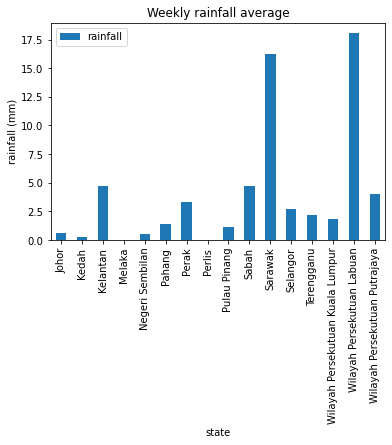

In [15]:
DFTest = DF
avg = DF.groupby('state')['rainfall'].mean().reset_index()
avg.plot(x='state', y='rainfall', kind = 'bar')
plt.ylabel('rainfall (mm)')
plt.title('Weekly rainfall average')

### Deployment

In [16]:
rainfaillAvgPath = r"C:\Users\ryeoh\Project\RainFallAnalysis\data\rainFallavg_bystate_Data.csv"
DFRainfallByState = pd.read_csv(rainfaillAvgPath)
RainFallByStateDict = {}
statesList = []
rainfallList = []
for state in DFRainfallByState['state']:
    #RainFallByStateDict[state] = DFRainfallByState[DFRainfallByState['state'] == state]['rainfall'].values[0]
    statesList.append(state)
    rainfallList.append(DFRainfallByState[DFRainfallByState['state'] == state]['rainfall'].values[0])
#print(RainFallByStateDict)


# Rainfall trend across week

state
Johor                               AxesSubplot(0.125,0.125;0.775x0.755)
Kedah                               AxesSubplot(0.125,0.125;0.775x0.755)
Kelantan                            AxesSubplot(0.125,0.125;0.775x0.755)
Melaka                              AxesSubplot(0.125,0.125;0.775x0.755)
Negeri Sembilan                     AxesSubplot(0.125,0.125;0.775x0.755)
Pahang                              AxesSubplot(0.125,0.125;0.775x0.755)
Perak                               AxesSubplot(0.125,0.125;0.775x0.755)
Perlis                              AxesSubplot(0.125,0.125;0.775x0.755)
Pulau Pinang                        AxesSubplot(0.125,0.125;0.775x0.755)
Sabah                               AxesSubplot(0.125,0.125;0.775x0.755)
Sarawak                             AxesSubplot(0.125,0.125;0.775x0.755)
Selangor                            AxesSubplot(0.125,0.125;0.775x0.755)
Terengganu                          AxesSubplot(0.125,0.125;0.775x0.755)
Wilayah Persekutuan Kuala Lumpur    AxesSubpl

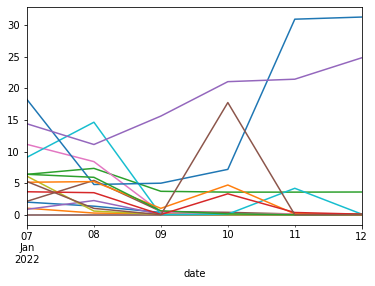

In [17]:
DFDayTrend = DF.groupby(['state', 'date'])['rainfall'].mean().reset_index()
DFDayTrend.set_index('date', inplace=True)
DFDayTrend.groupby('state')['rainfall'].plot()

In [18]:
rainfallAcrossWeekPath = r"C:\Users\ryeoh\Project\RainFallAnalysis\data\rainFall_acrossweek_Data.csv"
DFDayTrend.to_csv(rainfallAcrossWeekPath)

### Deployment

In [26]:
rainfallAcrossWeekPath = r"C:\Users\ryeoh\Project\RainFallAnalysis\data\rainFall_acrossweek_Data.csv"
DFDayTrend = pd.read_csv(rainfallAcrossWeekPath)
#rainfallAcrossWeek = {}
rainfallAcrossWeekList = []
daysList = []

groupedRainfallByState = DFDayTrend.groupby('state')
'''
for state in groupedRainfallByState.groups:
    weeklyRainfallData = []
    #print(groupedRainfallByState.get_group(state))
    stateData = groupedRainfallByState.get_group(state)
    for date in stateData.index:
        weeklyRainfallData.append(stateData.loc[date]['rainfall'])
    rainfallAcrossWeek[state] = weeklyRainfallData
'''
state = "Johor"
stateData = groupedRainfallByState.get_group(state)
for date in stateData.index:
    #weeklyRainfallData.append(stateData.loc[date]['rainfall'])
    rainfallList.append(stateData.loc[date]['rainfall'])
    daysList.append(stateData.loc[date]['date'])
#rainfallAcrossWeek[state] = weeklyRainfallData
print(rainfallList)
print(daysList)

    

[0.6456582633053222, 0.2462686567164179, 4.694444444444445, 0.0, 0.5218579234972678, 1.445273631840796, 3.352777777777778, 0.0, 1.0885416666666667, 4.681818181818182, 16.16736694677871, 2.70497311827957, 2.185606060606061, 1.8161764705882355, 17.739583333333332, 4.0, 1.9915254237288136, 1.3516949152542372, 0.3644067796610169, 0.0508474576271186, 0.1313559322033898, 0.0169491525423728, 1.9915254237288136, 1.3516949152542372, 0.3644067796610169, 0.0508474576271186, 0.1313559322033898, 0.0169491525423728, 1.9915254237288136, 1.3516949152542372, 0.3644067796610169, 0.0508474576271186, 0.1313559322033898, 0.0169491525423728]
['2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12']


In [20]:
rainfaillAvgPath = r"C:\Users\ryeoh\Project\RainFallAnalysis\data\rainFallavg_bystate_Data.csv"
avg.to_csv(rainfaillAvgPath)

# Rainfall across district


In [21]:
DFDistrict = DF.groupby(['state', 'district']).mean().reset_index()


### Deployment

In [22]:
DFDistrictPath = r"C:\Users\ryeoh\Project\RainFallAnalysis\data\rainFallavg_bydistrict_Data.csv"
DFDistrict.to_csv(DFDistrictPath)

In [23]:
DFDistrictPath = r"C:\Users\ryeoh\Project\RainFallAnalysis\data\rainFallavg_bydistrict_Data.csv"
DFDistrict = pd.read_csv(DFDistrictPath)


In [ ]:
districts = DFDistrict[DFDistrict['state'] == state]['district'].unique()
districtRainfall = {}
districtList = []
rainfallList = []
for district in districts:
    rainfallList.append(DFDistrict[DFDistrict['district'] == district]['rainfall'].values[0])
    #districtRainfall[district] = DFDistrict[DFDistrict['district'] == district]['rainfall'].values[0]
    districtList.append
statesDistrictRainfall[state] = districtRainfall

In [24]:
states = DFDistrict['state'].unique()
statesDistrictRainfall = []
for state in states:
    districts = DFDistrict[DFDistrict['state'] == state]['district'].unique()
    districtRainfall = {}
    for district in districts:
        districtRainfall[district] = DFDistrict[DFDistrict['district'] == district]['rainfall'].values[0]
    statesDistrictRainfall[state] = districtRainfall

print(statesDistrictRainfall)

TypeError: list indices must be integers or slices, not str

In [ ]:
DFDistrict.head()

,state,district,rainfall
0,Johor,Batu Pahat,1.444444
1,Johor,Johor Bahru,1.347222
2,Johor,Kluang,0.375000
3,Johor,Kota Tinggi,0.175926
4,Johor,Kulai,0.619048
